In [17]:
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
data=pd.read_csv("./accelerometer.csv")
data.head()

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


In [19]:
data.tail()

,wconfid,pctid,x,y,z
152995,3,100,1.051,0.090,-0.262
152996,3,100,0.918,0.039,-0.129
152997,3,100,1.156,-0.094,-0.227
152998,3,100,0.934,0.203,-0.172
152999,3,100,1.199,-0.176,0.109


# Mean

In [20]:
data.mean()


wconfid     2.000000
pctid      60.000000
x           0.995622
y           0.005351
z          -0.117769
dtype: float64

# Describe

In [21]:
data.describe()

,wconfid,pctid,x,y,z
count,153000.000000,153000.000000,153000.000000,153000.000000,153000.000000
mean,2.000000,60.000000,0.995622,0.005351,-0.117769
std,0.816499,24.494977,0.773958,0.742602,0.517008
min,1.000000,20.000000,-8.000000,-8.000000,-5.867000
25%,1.000000,40.000000,0.945000,-0.078000,-0.172000
50%,2.000000,60.000000,0.992000,0.008000,-0.125000
75%,3.000000,80.000000,1.039000,0.105000,-0.066000
max,3.000000,100.000000,7.996000,7.996000,6.086000


# Covariance

In [22]:
data.cov()

,wconfid,pctid,x,y,z
wconfid,0.666671,0.000000,-0.003833,0.003257,0.000941
pctid,0.000000,600.003922,0.040352,0.052419,0.113527
x,-0.003833,0.040352,0.599011,0.012148,-0.036479
y,0.003257,0.052419,0.012148,0.551457,-0.010641
z,0.000941,0.113527,-0.036479,-0.010641,0.267297


# Correlation

In [23]:
data.corr()

,wconfid,pctid,x,y,z
wconfid,1.000000,0.000000,-0.006065,0.005371,0.002228
pctid,0.000000,1.000000,0.002128,0.002882,0.008964
x,-0.006065,0.002128,1.000000,0.021137,-0.091164
y,0.005371,0.002882,0.021137,1.000000,-0.027716
z,0.002228,0.008964,-0.091164,-0.027716,1.000000


In [24]:
data.var()

wconfid      0.666671
pctid      600.003922
x            0.599011
y            0.551457
z            0.267297
dtype: float64

# PCA

###  Standarding

In [25]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(data)

In [26]:
X_covariance_matrix=np.cov(X_std.T)
X_covariance_matrix

array([[ 1.00000654e+00, -3.71528042e-19, -6.06508746e-03,
         5.37104192e-03,  2.22837628e-03],
       [-3.71528042e-19,  1.00000654e+00,  2.12849280e-03,
         2.88174556e-03,  8.96455590e-03],
       [-6.06508746e-03,  2.12849280e-03,  1.00000654e+00,
         2.11369848e-02, -9.11649541e-02],
       [ 5.37104192e-03,  2.88174556e-03,  2.11369848e-02,
         1.00000654e+00, -2.77157745e-02],
       [ 2.22837628e-03,  8.96455590e-03, -9.11649541e-02,
        -2.77157745e-02,  1.00000654e+00]])

# Eigenvalues and Eigenvector

In [27]:
Eigenvalues, Eigenvectors = np.linalg.eig(X_covariance_matrix)
print('Eigenvalues %s \n' %Eigenvalues)
print('Eigenvectors \n%s\n' %Eigenvectors)


Eigenvalues [1.10307152 0.90782481 0.98441269 1.00401092 1.00071274] 

Eigenvectors 
[[-0.03727795  0.02523764 -0.40979266  0.76852115  0.48930424]
 [-0.03628142 -0.08698171 -0.21728163  0.43752949 -0.86745287]
 [ 0.66406168  0.69453611 -0.254733   -0.07949737 -0.07370854]
 [ 0.31503654  0.05592847  0.83103962  0.45496234  0.00253047]
 [-0.6760681   0.71153977  0.17129775  0.06806344 -0.05164814]]



In [28]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(Eigenvalues[i]), Eigenvectors[:,i]) for i in range(len(Eigenvalues))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.103071524005504
1.0040109166871491
1.0007127398403595
0.9844126931210018
0.9078248062981319


In [29]:
total=sum(Eigenvalues)
variance_exp=[(i / total)*100 for i in sorted(Eigenvalues, reverse=True)]
print ("Variance captured by each component is \n",variance_exp)
Cumulative_variance_exp=np.cumsum(variance_exp)
print("==============================================================================")
print("Captures of total variation travel each component (%)\n",Cumulative_variance_exp)

Variance captured by each component is 
 [22.061286287754047, 20.08008709048594, 20.014123984684375, 19.688125181022283, 18.156377456053356]
Captures of total variation travel each component (%)
 [ 22.06128629  42.14137338  62.15549736  81.84362254 100.        ]


In [30]:
W_matrix = np.hstack((eig_pairs[0][1].reshape(5,1),
                      eig_pairs[1][1].reshape(5,1)))
W_matrix

array([[-0.03727795,  0.76852115],
       [-0.03628142,  0.43752949],
       [ 0.66406168, -0.07949737],
       [ 0.31503654,  0.45496234],
       [-0.6760681 ,  0.06806344]])

### Two component principal

In [31]:
Y = X_std.dot(W_matrix)
Y[0:5]

array([[ 0.15745795, -1.60567644],
       [ 0.1010347 , -1.68716049],
       [ 0.12219696, -1.6015548 ],
       [ 0.1032796 , -1.66656357],
       [ 0.10382637, -1.66968116]])

Text(0.5, 1.0, 'PCA of Accelerometer dataset')

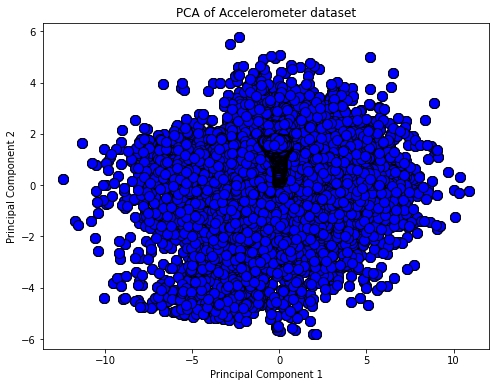

In [48]:

plt.figure(2, figsize=(8, 6))
plt.clf()
# target_names =  data.target_names
# Plot the training points
x=data["pctid"];
y=data["wconfid"];
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Y[i:, 0], Y[i:, 1],s=100,c=c,cmap=plt.cm.Set1,
        edgecolor="k")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Accelerometer dataset")

# three principal component

C:\Users\ADMIN\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  """


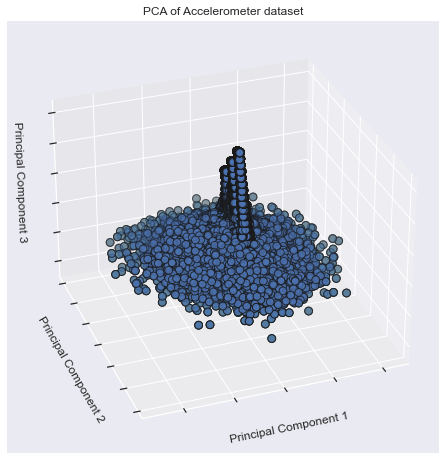

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(2, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_std)
for c, i in zip("rgb", [0, 1, 2]):
    ax.scatter(
        X_reduced[i:, 0],
        X_reduced[i:, 1],
        X_reduced[i:, 2],
        cmap=plt.cm.Set1,
        edgecolor="k",
        s=60,
        c=c,
    )
ax.set_title("PCA of Accelerometer dataset")
ax.set_xlabel("Principal Component 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Principal Component 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Principal Component 3")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [ ]:
W_matrix_1 = np.hstack((eig_pairs[0][1].reshape(5,1),
                      eig_pairs[1][1].reshape(5,1),
                      eig_pairs[2][1].reshape(5,1)))
W_matrix_1


array([[-0.03727795,  0.76852115,  0.48930424],
       [-0.03628142,  0.43752949, -0.86745287],
       [ 0.66406168, -0.07949737, -0.07370854],
       [ 0.31503654,  0.45496234,  0.00253047],
       [-0.6760681 ,  0.06806344, -0.05164814]])

In [ ]:
Y1 = X_std.dot(W_matrix_1)
Y1[0:5]

array([[ 0.15745795, -1.60567644,  0.81748467],
       [ 0.1010347 , -1.68716049,  0.81703146],
       [ 0.12219696, -1.6015548 ,  0.82041834],
       [ 0.1032796 , -1.66656357,  0.8212882 ],
       [ 0.10382637, -1.66968116,  0.81710482]])

# Visualize data distribution 

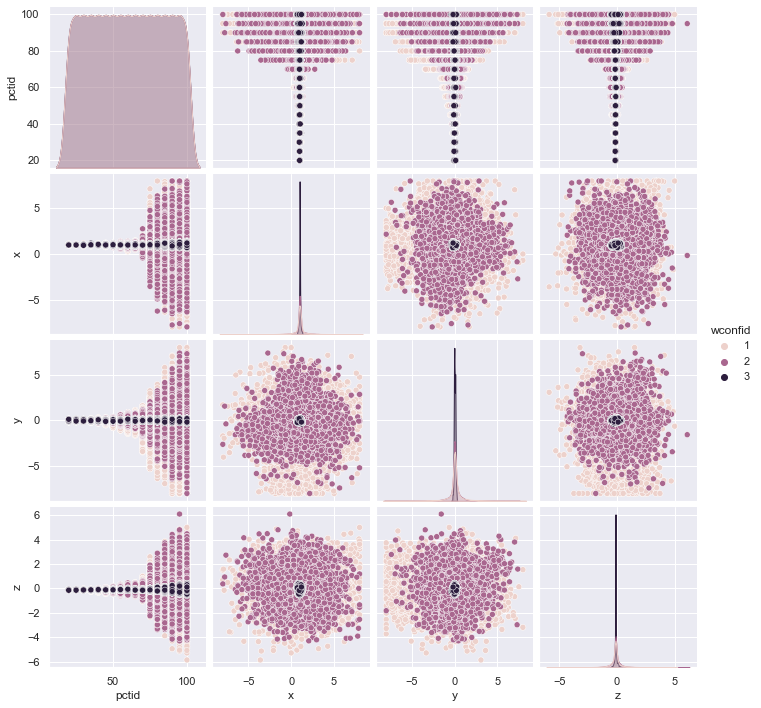

In [ ]:
import seaborn as sns
sns.set()
p=sns.pairplot(data, hue='wconfid')

<Figure size 1080x576 with 0 Axes>

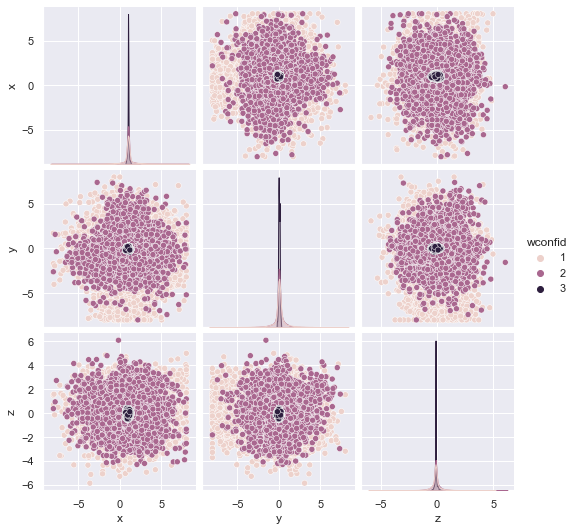

In [ ]:
plt.figure(figsize=(15,8))
sns.pairplot(data.drop(['pctid'], axis=1), hue='wconfid', height=2.5)
plt.show()